In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [4]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [5]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1 style="color: green;">CREATING INSIGHTS</h1>

<h1>1) During which months do dengue cases generally tend to be highest?</h1>

In [6]:
df_seasonal = dengue.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
df_seasonal

,Dengue_Cases,Dengue_Deaths
Month,,
January,84328,394
February,77801,315
March,57576,291
April,32508,200
May,32387,162
June,58110,322
July,138242,611
August,187554,714
September,177943,6148


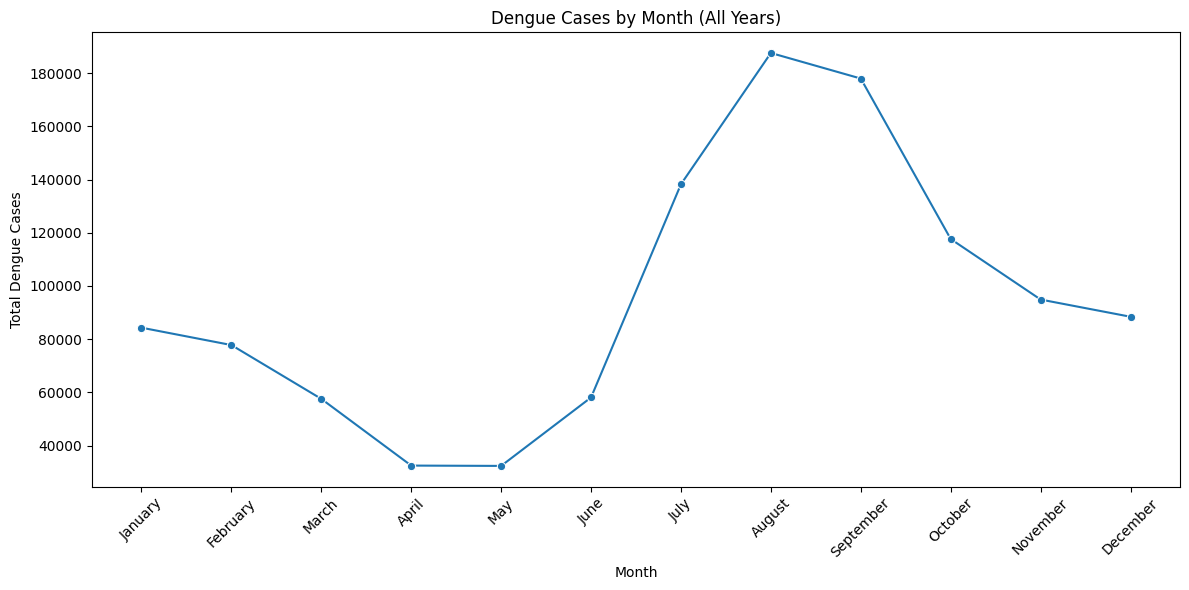

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_seasonal['Dengue_Cases'], marker='o')
plt.title('Dengue Cases by Month (All Years)')
plt.ylabel('Total Dengue Cases')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1 style="color: blue;">Insight 1</h1>
<h3 style="color: blue;">Dengue cases tend to increase during the rainy season, particularly from July to September. This is when mosquitoes breed more easily.</h3>

<h1>2) Do dengue case numbers stay the same each year, or do they change?</h1>

In [8]:
df_yearly = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
df_yearly

,Dengue_Cases,Dengue_Deaths
Year,,
2016,209544,8127
2017,154155,4563
2018,250783,1226
2019,441902,1733
2020,91041,1195


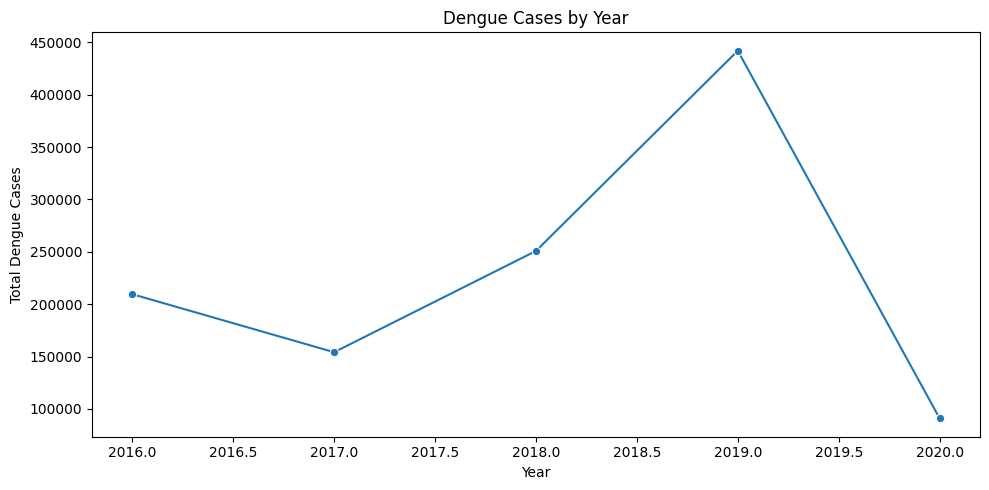

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_yearly['Dengue_Cases'], marker='o')
plt.title('Dengue Cases by Year')
plt.ylabel('Total Dengue Cases')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

<h1 style="color: blue;">Insight 2</h1>
<h3 style="color: blue;">They change significantly from year to year.</h3>

<h1>3) What was the general trend in dengue cases before 2020: increasing, decreasing, or staying the same?
</h1>

In [10]:
yearly_increase = df_yearly.loc[2016:2019, 'Dengue_Cases'].diff().dropna()
yearly_increase

Year
2017    -55389.0
2018     96628.0
2019    191119.0
Name: Dengue_Cases, dtype: float64

<h1 style="color: blue;">Insight 3</h1>
<h3 style="color: blue;">Dengue cases were generally increasing from 2016 to 2019, which means dengue was becoming a bigger problem over time</h3>

<h1>4) Does the number of deaths always go up when the number of dengue cases goes up?
</h1>

In [11]:
dengue['Month'] = pd.Categorical(dengue['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)

In [12]:
dengue['Case_Fatality_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
dengue


,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Case_Fatality_Rate
0,January,2016,Region I,705,1,0.001418
1,February,2016,Region I,374,0,0.000000
2,March,2016,Region I,276,0,0.000000
3,April,2016,Region I,240,2,0.008333
4,May,2016,Region I,243,1,0.004115
...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,0.000000
1016,September,2020,BARMM,16,8,0.500000
1017,October,2020,BARMM,13,9,0.692308
1018,November,2020,BARMM,15,1,0.066667


In [13]:
correlation = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr().iloc[0, 1]
correlation

0.038322137204194966

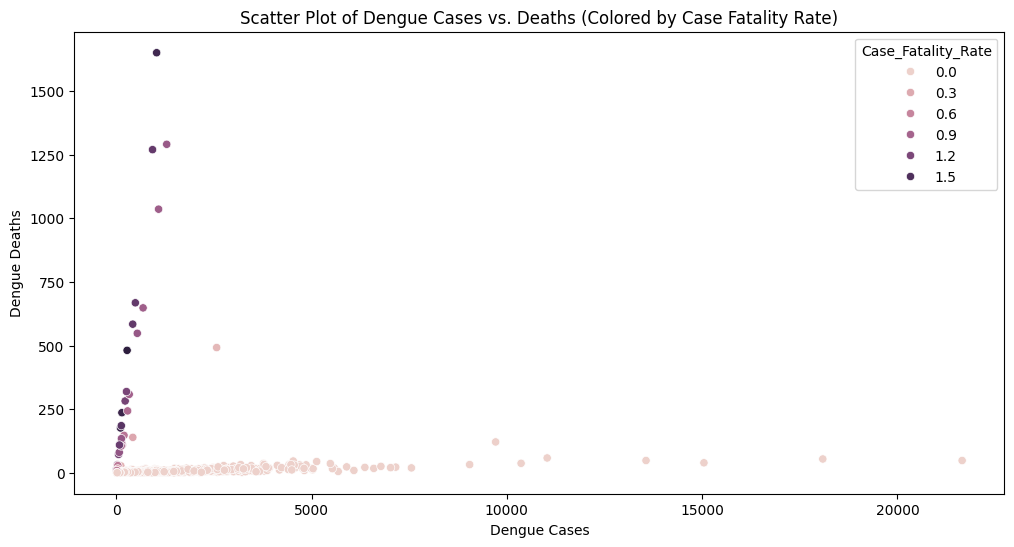

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Case_Fatality_Rate') # Corrected line
plt.title('Scatter Plot of Dengue Cases vs. Deaths (Colored by Case Fatality Rate)')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()

<h1 style="color: blue;">Insight 4</h1>
<h3 style="color: blue;">The dengue cases and dengue deaths indicate a very weak correlation. Sometimes, an increase in dengue cases doesn't lead to a similar increase in deaths.</h3> 

<h1>5) Are all regions equally affected by dengue?
</h1>

In [15]:
regional_cases = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
regional_cases

Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Region X        82437
Region XII      59802
Region I        59066
Region VIII     51983
Region IX       47781
Region II       45141
Region XIII     35293
Region XI       32522
Region IV-B     30849
CAR             30582
Region V        22167
BARMM           11537
Name: Dengue_Cases, dtype: int64

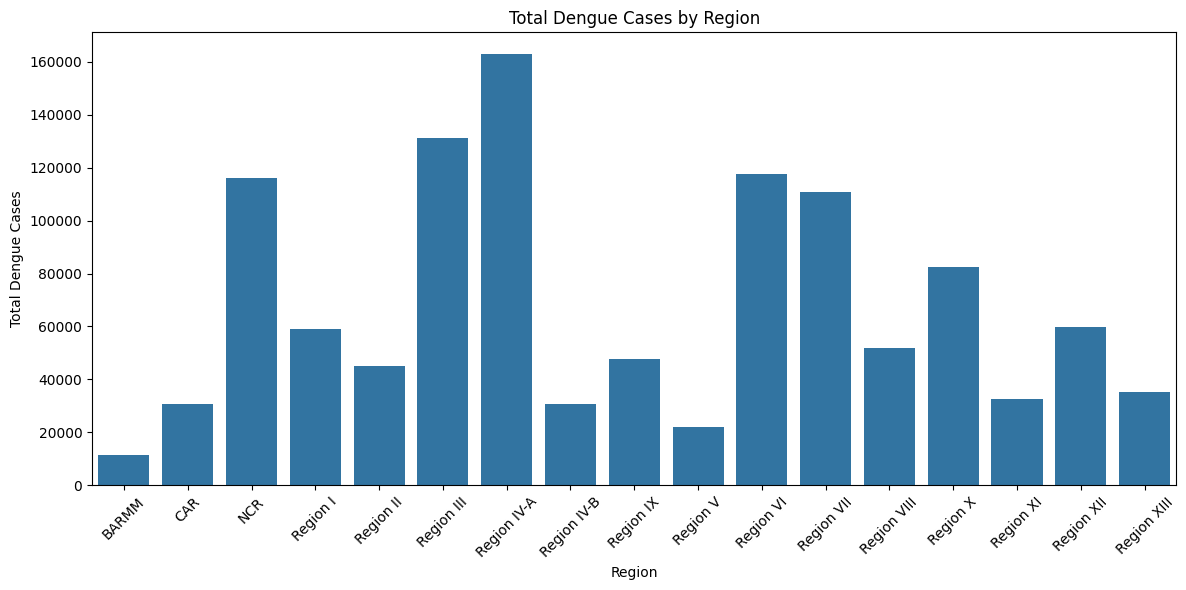

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_cases.index, y=regional_cases.values)
plt.title('Total Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1 style="color: blue;">Insight 5</h1>
<h3 style="color: blue;">Some regions have more dengue cases than others.</h3>

<h1>6) Which region consistently reports some of the highest numbers of dengue cases?
</h1>

In [17]:
regional_cases_yearly = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum().unstack()
regional_cases_total = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
print("Total Dengue Cases by Region (All Years):")
print(regional_cases_total)
print("\nDengue Cases by Region and Year:")
print(regional_cases_yearly)

Total Dengue Cases by Region (All Years):
Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Region X        82437
Region XII      59802
Region I        59066
Region VIII     51983
Region IX       47781
Region II       45141
Region XIII     35293
Region XI       32522
Region IV-B     30849
CAR             30582
Region V        22167
BARMM           11537
Name: Dengue_Cases, dtype: int64

Dengue Cases by Region and Year:
Year          2016   2017   2018   2019   2020
Region                                        
BARMM         2191    485   2460   5393   1008
CAR           9164   4045   7584   8808    981
NCR          13002  26103  29200  40478   7183
Region I      8281   8236  15511  19867   7171
Region II     3891   5310  17678  16634   1628
Region III   20989  25200  31726  37158  15991
Region IV-A  24282  22421  30410  76195   9721
Region IV-B   3999   2770   8019  10984   5077
Region IX     7215   4274   6161  27447 

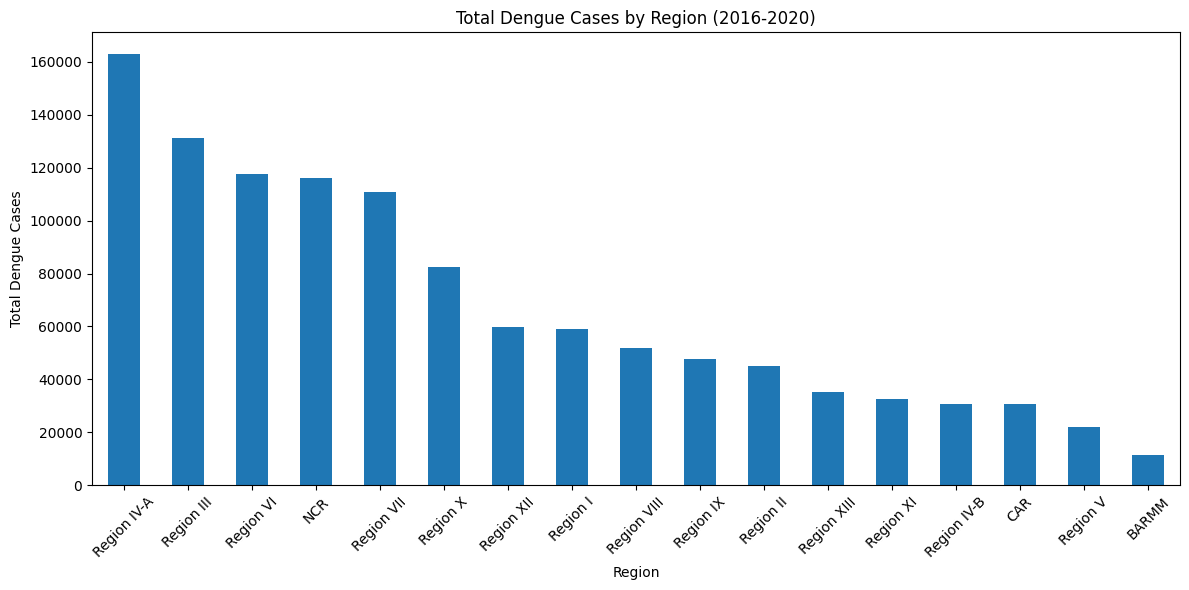

In [18]:
plt.figure(figsize=(12, 6))
regional_cases_total.plot(kind='bar')
plt.title('Total Dengue Cases by Region (2016-2020)')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
region_IVA_cases = dengue[dengue['Region'] == 'Region IV-A'].groupby('Year')['Dengue_Cases'].sum()
region_IVA_cases

Year
2016    24282
2017    22421
2018    30410
2019    76195
2020     9721
Name: Dengue_Cases, dtype: int64

<h1 style="color: blue;">Insight 6</h1>
<h3 style="color: blue;">The Region IV-A has a consistently high number of dengue cases.
</h3>

<h1>7) Besides Region IV-A, which other region consistently reports a high incidence of dengue cases?
</h1>

In [20]:
dengue_cases_per_region = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
dengue_cases_per_region

,Year,Region,Dengue_Cases
0,2016,BARMM,2191
1,2016,CAR,9164
2,2016,NCR,13002
3,2016,Region I,8281
4,2016,Region II,3891
...,...,...,...
80,2020,Region VIII,4832
81,2020,Region X,6225
82,2020,Region XI,1936
83,2020,Region XII,4363


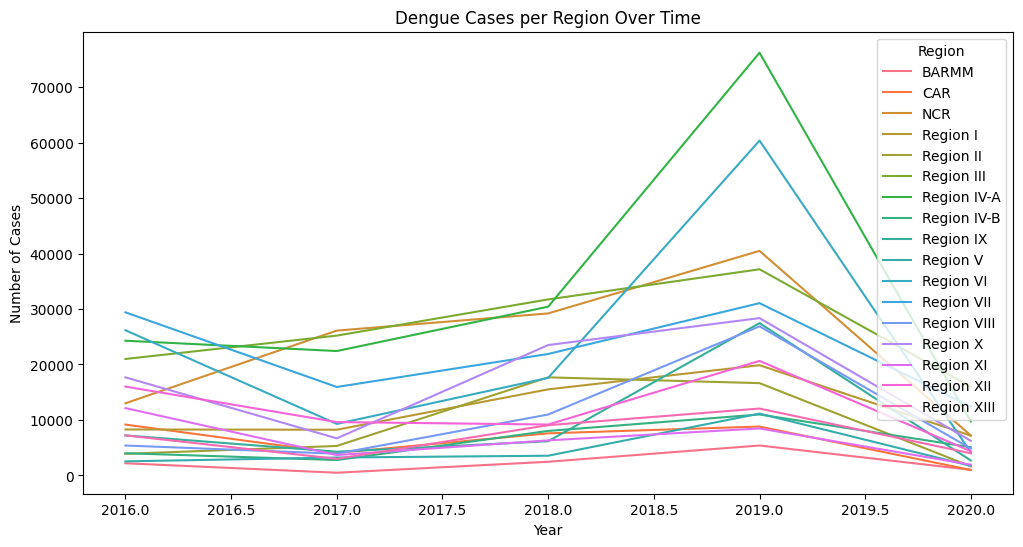

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Dengue_Cases', hue='Region', data=dengue_cases_per_region)
plt.title('Dengue Cases per Region Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

In [22]:
region_VI_cases = dengue[dengue['Region'] == 'Region VI'].groupby('Year')['Dengue_Cases'].sum()
region_VI_cases

Year
2016    26170
2017     9283
2018    17582
2019    60357
2020     4131
Name: Dengue_Cases, dtype: int64

<h1 style="color: blue;">Insight 7</h1>
<h3 style="color: blue;">Region VI also experiences a consistently high number of dengue cases.</h3>

<h1>8) Which region typically has the lowest number of dengue cases compared to other regions?
</h1>

In [23]:
regional_cases = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values()
print("\nRegions by total cases:")
print(regional_cases)


Regions by total cases:
Region
BARMM           11537
Region V        22167
CAR             30582
Region IV-B     30849
Region XI       32522
Region XIII     35293
Region II       45141
Region IX       47781
Region VIII     51983
Region I        59066
Region XII      59802
Region X        82437
Region VII     110683
NCR            115966
Region VI      117523
Region III     131064
Region IV-A    163029
Name: Dengue_Cases, dtype: int64


In [24]:
regional_cases = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values()
lowest_region = regional_cases.index[0] 
lowest_cases = regional_cases.iloc[0]

print(f"Region with the lowest total dengue cases: {lowest_region} with {lowest_cases} cases")

Region with the lowest total dengue cases: BARMM with 11537 cases


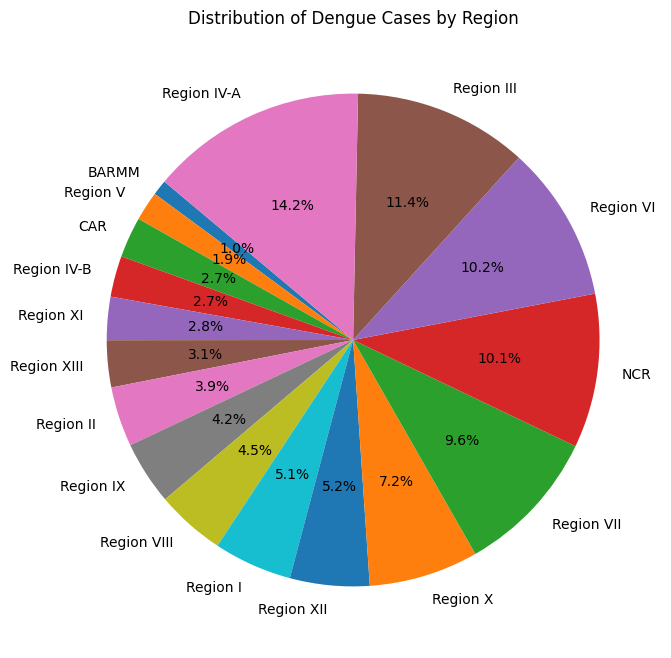

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(regional_cases, labels=regional_cases.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dengue Cases by Region')
plt.show()

In [26]:
BARMM_cases = dengue[dengue['Region'] == 'BARMM'].groupby('Year')['Dengue_Cases'].sum()
BARMM_cases

Year
2016    2191
2017     485
2018    2460
2019    5393
2020    1008
Name: Dengue_Cases, dtype: int64

<h1 style="color: blue;">Insight 8</h1>
<h3 style="color: blue;">BARMM has the lowest number of cases compared to others with 1.0% and 11537 cases.</h3>

<h1>9) Which region has moderate dengue cases, but shows a notable increase in recent years?
</h1>

In [27]:
regional_cases

Region
BARMM           11537
Region V        22167
CAR             30582
Region IV-B     30849
Region XI       32522
Region XIII     35293
Region II       45141
Region IX       47781
Region VIII     51983
Region I        59066
Region XII      59802
Region X        82437
Region VII     110683
NCR            115966
Region VI      117523
Region III     131064
Region IV-A    163029
Name: Dengue_Cases, dtype: int64

In [28]:
lower_percentile = 25 
upper_percentile = 75  
lower_threshold = regional_cases.quantile(lower_percentile/100)
upper_threshold = regional_cases.quantile(upper_percentile/100)
moderate_regions = regional_cases[(regional_cases >= lower_threshold) & (regional_cases <= upper_threshold)]

for region in moderate_regions.index:
    cases_by_year = dengue[dengue['Region'] == region].groupby('Year')['Dengue_Cases'].sum()
    percentage_change = cases_by_year.pct_change() * 100
    average_increase = percentage_change.mean()

    print(f"\nRegion: {region}")
    print(f"Total Cases: {regional_cases[region]}")
    print(f"Average Yearly Percentage Increase: {average_increase:.2f}%")


Region: Region XI
Total Cases: 32522
Average Yearly Percentage Increase: -10.16%

Region: Region XIII
Total Cases: 35293
Average Yearly Percentage Increase: 27.65%

Region: Region II
Total Cases: 45141
Average Yearly Percentage Increase: 43.32%

Region: Region IX
Total Cases: 47781
Average Yearly Percentage Increase: 64.67%

Region: Region VIII
Total Cases: 51983
Average Yearly Percentage Increase: 53.94%

Region: Region I
Total Cases: 59066
Average Yearly Percentage Increase: 12.99%

Region: Region XII
Total Cases: 59802
Average Yearly Percentage Increase: 0.40%

Region: Region X
Total Cases: 82437
Average Yearly Percentage Increase: 33.05%

Region: Region VII
Total Cases: 110683
Average Yearly Percentage Increase: -6.66%


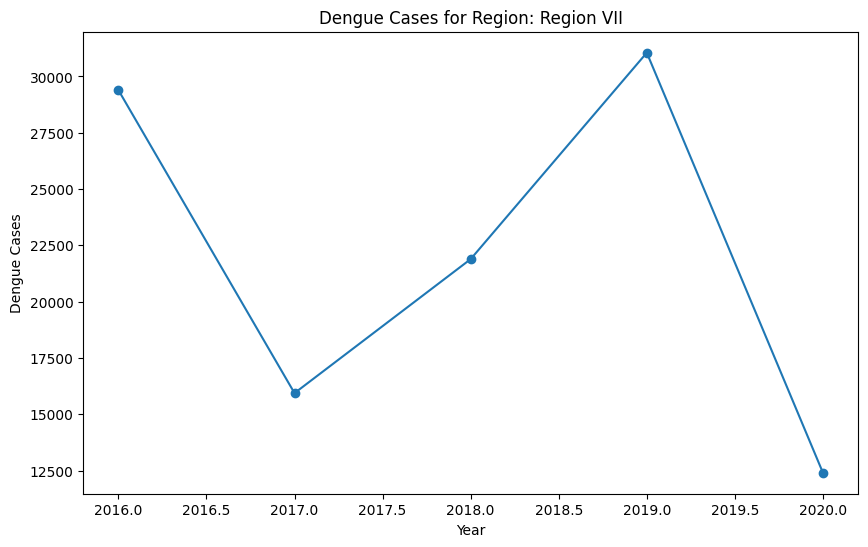

In [29]:
plt.figure(figsize=(10,6))
cases_by_year.plot(kind = 'line', marker = 'o')
plt.title(f'Dengue Cases for Region: {region}')
plt.ylabel('Dengue Cases')
plt.xlabel('Year')
plt.show()

In [30]:
Region_XIII = dengue[dengue['Region'] == 'Region XIII'].groupby('Year')['Dengue_Cases'].sum()
print("\nRegionXIII per year cases:")
print(Region_XIII)


RegionXIII per year cases:
Year
2016     7215
2017     2988
2018     9053
2019    12054
2020     3983
Name: Dengue_Cases, dtype: int64


<h1 style="color: blue;">Insight 9</h1>
<h3 style="color: blue;">Region XIII has a moderate number of cases, but they've been increasing.</h3>

<h1>10) Which region experiences severe dengue outbreaks, especially in certain years?

</h1>

In [31]:
regional_cases

Region
BARMM           11537
Region V        22167
CAR             30582
Region IV-B     30849
Region XI       32522
Region XIII     35293
Region II       45141
Region IX       47781
Region VIII     51983
Region I        59066
Region XII      59802
Region X        82437
Region VII     110683
NCR            115966
Region VI      117523
Region III     131064
Region IV-A    163029
Name: Dengue_Cases, dtype: int64

In [32]:
top_regions = regional_cases.sort_values(ascending=False).head(3)
print("Top regions by total dengue cases:\n", top_regions)

Top regions by total dengue cases:
 Region
Region IV-A    163029
Region III     131064
Region VI      117523
Name: Dengue_Cases, dtype: int64


In [33]:
for region in top_regions.index:
    yearly_cases = dengue[dengue['Region'] == region].groupby('Year')['Dengue_Cases'].sum()
    print(f"\nYearly cases for {region}:\n", yearly_cases)


Yearly cases for Region IV-A:
 Year
2016    24282
2017    22421
2018    30410
2019    76195
2020     9721
Name: Dengue_Cases, dtype: int64

Yearly cases for Region III:
 Year
2016    20989
2017    25200
2018    31726
2019    37158
2020    15991
Name: Dengue_Cases, dtype: int64

Yearly cases for Region VI:
 Year
2016    26170
2017     9283
2018    17582
2019    60357
2020     4131
Name: Dengue_Cases, dtype: int64


In [34]:
for region in top_regions.index:
    yearly_cases = dengue[dengue['Region'] == region].groupby('Year')['Dengue_Cases'].sum()
    severe_years = yearly_cases[yearly_cases > yearly_cases.quantile(0.75)]  # Years with cases above the 75th percentile
    print(f"\nSevere outbreak years in {region}:\n", severe_years)


Severe outbreak years in Region IV-A:
 Year
2019    76195
Name: Dengue_Cases, dtype: int64

Severe outbreak years in Region III:
 Year
2019    37158
Name: Dengue_Cases, dtype: int64

Severe outbreak years in Region VI:
 Year
2019    60357
Name: Dengue_Cases, dtype: int64


In [35]:
outbreak_severity = {}
for region in top_regions.index:
    yearly_cases = dengue[dengue['Region'] == region].groupby('Year')['Dengue_Cases'].sum()
    outbreak_severity[region] = yearly_cases.max()  # Maximum cases 
print("\nOutbreak severity by region (maximum cases in any year):\n", pd.Series(outbreak_severity).sort_values(ascending=False))


Outbreak severity by region (maximum cases in any year):
 Region IV-A    76195
Region VI      60357
Region III     37158
dtype: int64


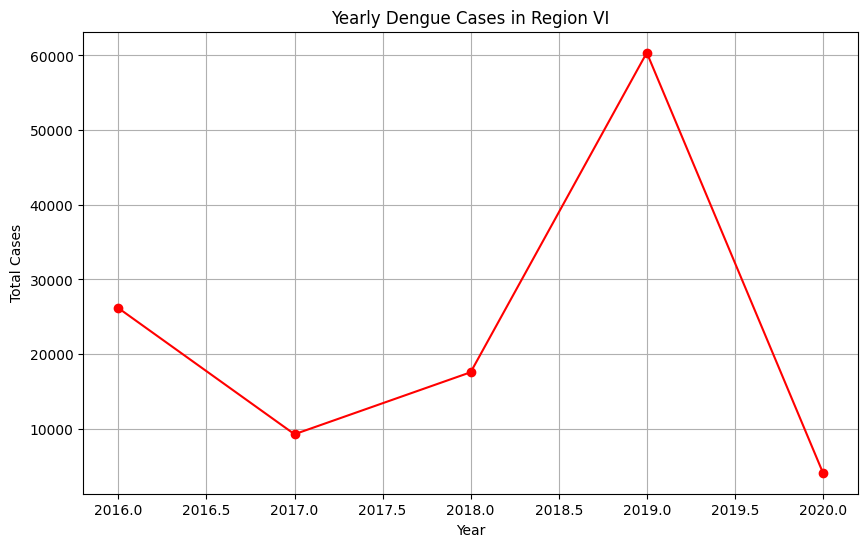

In [36]:
plt.figure(figsize=(10, 6))
yearly_cases.plot(kind='line', marker='o', color='red')
plt.title(f'Yearly Dengue Cases in {region}')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()

<h1 style="color: blue;">Insight 10</h1>
<h3 style="color: blue;">Region VI experiences significant dengue outbreaks, especially in certain years.</h3>

<h1>11) Which region experienced a concerning number of deaths in September and October 2017?
</h1>

In [37]:
#filter data fro sept and oct 2017
sept_oct_2017 = dengue[(dengue['Year'] == 2017) & (dengue['Month'].isin(['September', 'October']))]
sept_oct_2017

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Case_Fatality_Rate
20,September,2017,Region I,1333,3,0.002251
21,October,2017,Region I,1159,5,0.004314
80,September,2017,Region II,668,3,0.004491
81,October,2017,Region II,990,12,0.012121
140,September,2017,Region III,3263,9,0.002758
141,October,2017,Region III,2811,6,0.002134
200,September,2017,Region IV-A,2520,6,0.002381
201,October,2017,Region IV-A,2759,20,0.007249
260,September,2017,Region IV-B,286,2,0.006993
261,October,2017,Region IV-B,247,5,0.020243


In [38]:
#calculate total deaths by region
region_deaths = sept_oct_2017.groupby('Region')['Dengue_Deaths'].sum()
region_deaths

Region
BARMM             1
CAR               3
NCR              56
Region I          8
Region II        15
Region III       15
Region IV-A      26
Region IV-B       7
Region IX       292
Region V          7
Region VI      1316
Region VII     1076
Region VIII     383
Region X        525
Region XI       181
Region XII       12
Region XIII       1
Name: Dengue_Deaths, dtype: int64

In [39]:
max_deaths_region = region_deaths.idxmax()
max_deaths = region_deaths.max()

print(f"\nRegion with the highest deaths in September/October 2017: {max_deaths_region} ({max_deaths} deaths)")
print("\nTotal deaths by region in September/October 2017:\n", region_deaths.sort_values(ascending=False))


Region with the highest deaths in September/October 2017: Region VI (1316 deaths)

Total deaths by region in September/October 2017:
 Region
Region VI      1316
Region VII     1076
Region X        525
Region VIII     383
Region IX       292
Region XI       181
NCR              56
Region IV-A      26
Region II        15
Region III       15
Region XII       12
Region I          8
Region IV-B       7
Region V          7
CAR               3
BARMM             1
Region XIII       1
Name: Dengue_Deaths, dtype: int64


In [40]:
total_deaths = region_deaths.sum()
region_vii_deaths = region_deaths['Region VII']
percentage = (region_vii_deaths / total_deaths) * 100

print(f"\nRegion VII accounted for {percentage:.2f}% of all deaths in September/October 2017.")


Region VII accounted for 27.42% of all deaths in September/October 2017.


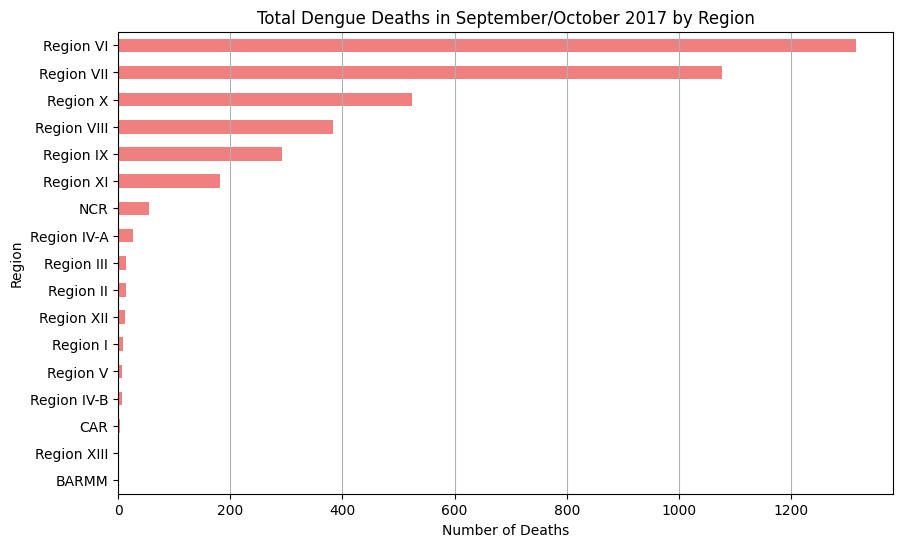

In [41]:
plt.figure(figsize=(10, 6))
region_deaths.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Total Dengue Deaths in September/October 2017 by Region')
plt.xlabel('Number of Deaths')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()

<h1 style="color: blue;">Insight 11</h1>
<h3 style="color: blue;">Region VI had a concerning number of deaths in September and October 2017.</h3>

<h1>12) Which region also experienced a high number of deaths in September and October 2017?
</h1>

In [42]:
sorted_deaths = region_deaths.sort_values(ascending=False)
sorted_deaths

Region
Region VI      1316
Region VII     1076
Region X        525
Region VIII     383
Region IX       292
Region XI       181
NCR              56
Region IV-A      26
Region II        15
Region III       15
Region XII       12
Region I          8
Region IV-B       7
Region V          7
CAR               3
BARMM             1
Region XIII       1
Name: Dengue_Deaths, dtype: int64

In [43]:
second_max_deaths_region = sorted_deaths.index[1]
second_max_deaths = sorted_deaths.iloc[1]

print(f"\nRegion with the second-highest deaths in September/October 2017: {second_max_deaths_region} ({second_max_deaths} deaths)")


Region with the second-highest deaths in September/October 2017: Region VII (1076 deaths)


In [44]:
total_deaths = region_deaths.sum()
region_viii_deaths = region_deaths['Region VII']
percentage = (region_viii_deaths / total_deaths) * 100

print(f"\nRegion VII accounted for {percentage:.2f}% of all deaths in September/October 2017.")


Region VII accounted for 27.42% of all deaths in September/October 2017.


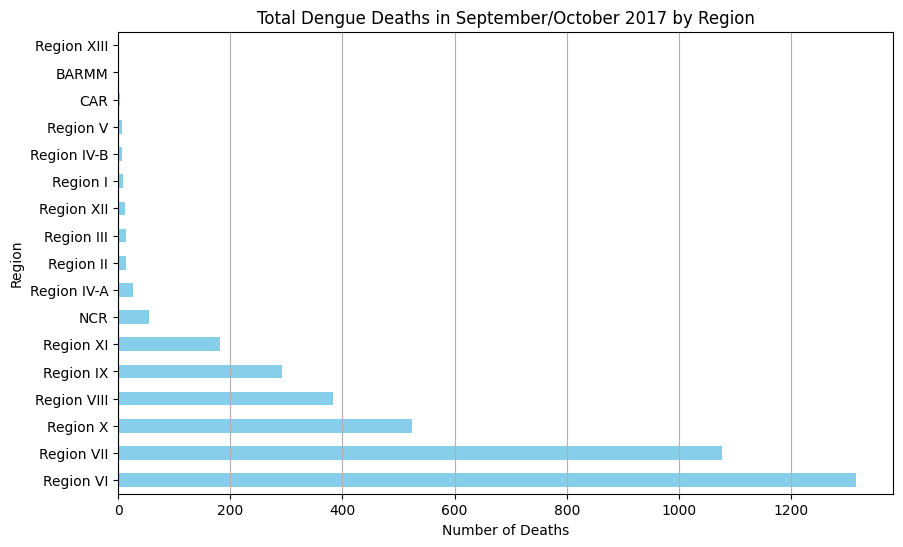

In [45]:
plt.figure(figsize=(10, 6))
sorted_deaths.plot(kind='barh', color='skyblue')
plt.title('Total Dengue Deaths in September/October 2017 by Region')
plt.xlabel('Number of Deaths')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()

<h1 style="color: blue;">Insight 12</h1>
<h3 style="color: blue;">Region VII also had a high number of deaths in September and October 2017.
</h3>

<h1>13) Does Region IV-B have more or fewer dengue cases than Region IV-A?

</h1>

In [46]:
#Filter data for Region IV-A and Region IV-B
region_iv_a = dengue[dengue['Region'] == 'Region IV-A']['Dengue_Cases'].sum()
region_iv_b = dengue[dengue['Region'] == 'Region IV-B']['Dengue_Cases'].sum()

print(f"Total cases in Region IV-A: {region_iv_a}")
print(f"Total cases in Region IV-B: {region_iv_b}")

Total cases in Region IV-A: 163029
Total cases in Region IV-B: 30849


In [47]:
#difference and percentage
difference = region_iv_a - region_iv_b
percentage_difference = (difference / region_iv_a) * 100

print(f"\nRegion IV-A has {difference} more cases than Region IV-B.")
print(f"This is {percentage_difference:.2f}% higher than Region IV-B.")


Region IV-A has 132180 more cases than Region IV-B.
This is 81.08% higher than Region IV-B.


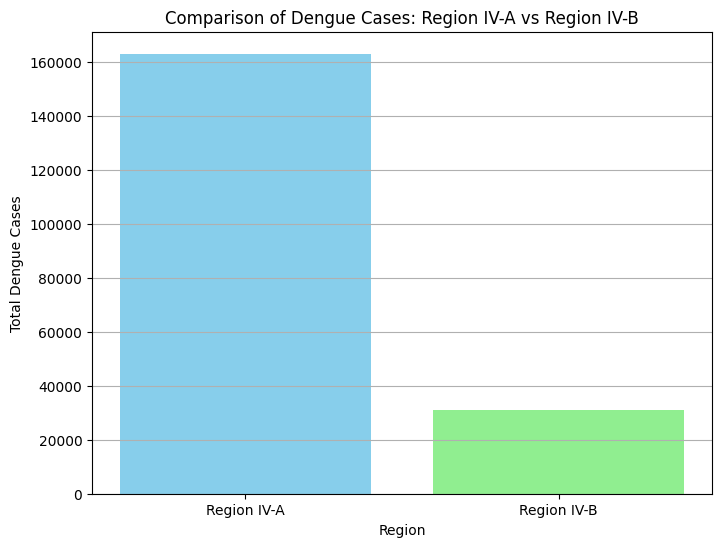

In [48]:
regions = ['Region IV-A', 'Region IV-B']
cases = [region_iv_a, region_iv_b]

plt.figure(figsize=(8, 6))
plt.bar(regions, cases, color=['skyblue', 'lightgreen'])
plt.title('Comparison of Dengue Cases: Region IV-A vs Region IV-B')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.grid(axis='y')
plt.show()

<h1 style="color: blue;">Insight 13</h1>
<h3 style="color: blue;">Region IV-B generally has fewer cases than Region IV-A.</h3>

<h1>14) Which year was particularly severe for dengue across most regions?</h1>

In [49]:
#total dengue cases by year
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
yearly_cases

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

In [50]:
peak_year = yearly_cases.idxmax()
peak_cases = yearly_cases.max()

print(f"\nThe year with the highest number of dengue cases: {peak_year} ({peak_cases} cases)")
print("\nTotal dengue cases by year:\n", yearly_cases.sort_values(ascending=False))


The year with the highest number of dengue cases: 2019 (441902 cases)

Total dengue cases by year:
 Year
2019    441902
2018    250783
2016    209544
2017    154155
2020     91041
Name: Dengue_Cases, dtype: int64


In [51]:
#percentage of total cases in the peak year
total_cases = yearly_cases.sum()
percentage = (peak_cases / total_cases) * 100
print(f"\n{peak_year} accounted for {percentage:.2f}% of all dengue cases in the dataset.")


2019 accounted for 38.51% of all dengue cases in the dataset.


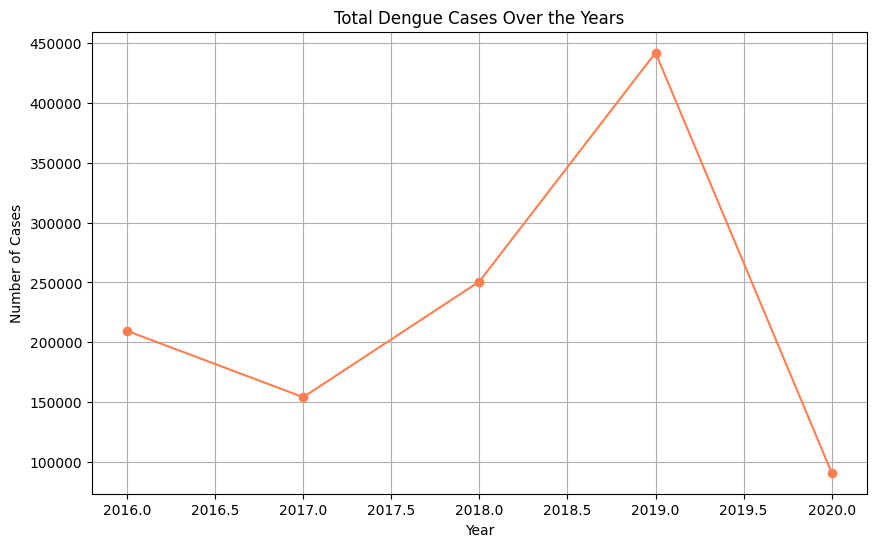

In [52]:
plt.figure(figsize=(10, 6))
yearly_cases.plot(kind='line', marker='o', color='coral')
plt.title('Total Dengue Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

<h1 style="color: blue;">Insight 14</h1>
<h3 style="color: blue;">2019 was a particularly bad year for dengue across most regions.</h3>

<h1>15) What happened to dengue cases in 2020 compared to previous years?

</h1>

In [53]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
yearly_cases

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

In [54]:
cases_2020 = yearly_cases[2020]

#compare 2020 to 2019
cases_2019 = yearly_cases[2019]
difference = cases_2019 - cases_2020
percentage_reduction = (difference / cases_2019) * 100

print(f"\nDengue cases in 2020: {cases_2020}")
print(f"Dengue cases in 2019: {cases_2019}")
print(f"Reduction in cases from 2019 to 2020: {difference} cases ({percentage_reduction:.2f}%)")


Dengue cases in 2020: 91041
Dengue cases in 2019: 441902
Reduction in cases from 2019 to 2020: 350861 cases (79.40%)


In [55]:
# Compare 2020 cases to the average of previous years (2016-2019)
# Use .loc to explicitly select the years 2016 to 2019
previous_years = yearly_cases.loc[2016:2019]
average_previous_years = previous_years.mean()
difference_avg = average_previous_years - cases_2020
percentage_reduction_avg = (difference_avg / average_previous_years) * 100

print(f"\nAverage cases from 2016 to 2019: {average_previous_years:.2f}")
print(f"Reduction in cases from average to 2020: {difference_avg:.2f} cases ({percentage_reduction_avg:.2f}%)")


Average cases from 2016 to 2019: 264096.00
Reduction in cases from average to 2020: 173055.00 cases (65.53%)


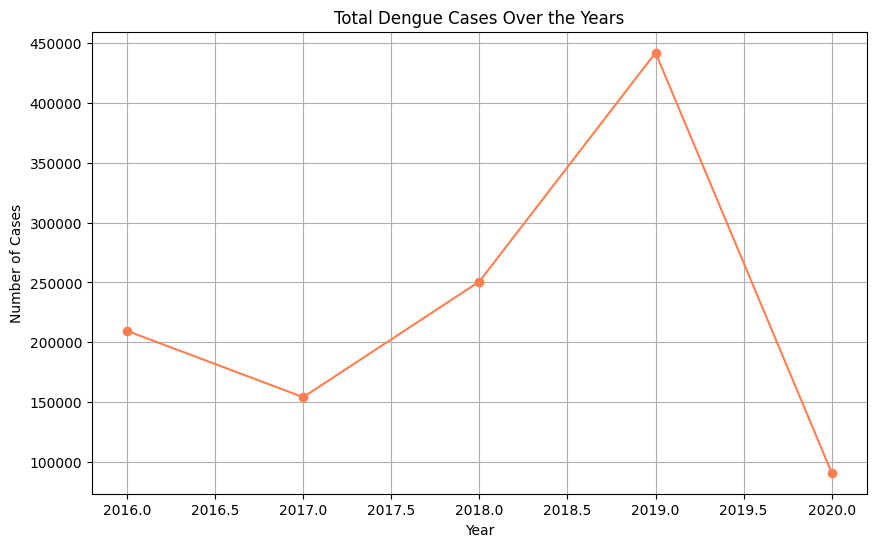

In [56]:
plt.figure(figsize=(10, 6))
yearly_cases.plot(kind='line', marker='o', color='coral')
plt.title('Total Dengue Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

<h1 style="color: blue;">Insight 15</h1>
<h3 style="color: blue;">The data confirms that 2020 experienced a substantial reduction in dengue cases compared to both 2019 and the historical average, marking it as a year with notably lower dengue incidence.
</h3>

<h1>16) Do dengue cases tend to increase or decrease in December?</h1>

In [57]:
december_cases = dengue[dengue['Month'] == 'December']
total_december_cases = december_cases['Dengue_Cases'].sum()
total_cases = dengue['Dengue_Cases'].sum()
percentage_december = (total_december_cases / total_cases) * 100

print(f"\nTotal dengue cases in December: {total_december_cases}")
print(f"Total dengue cases across all months: {total_cases}")
print(f"Percentage of cases in December: {percentage_december:.2f}%")


Total dengue cases in December: 88431
Total dengue cases across all months: 1147425
Percentage of cases in December: 7.71%


In [58]:
december_yearly = december_cases.groupby('Year')['Dengue_Cases'].sum()
december_yearly

Year
2016    13490
2017    13235
2018    31353
2019    24397
2020     5956
Name: Dengue_Cases, dtype: int64

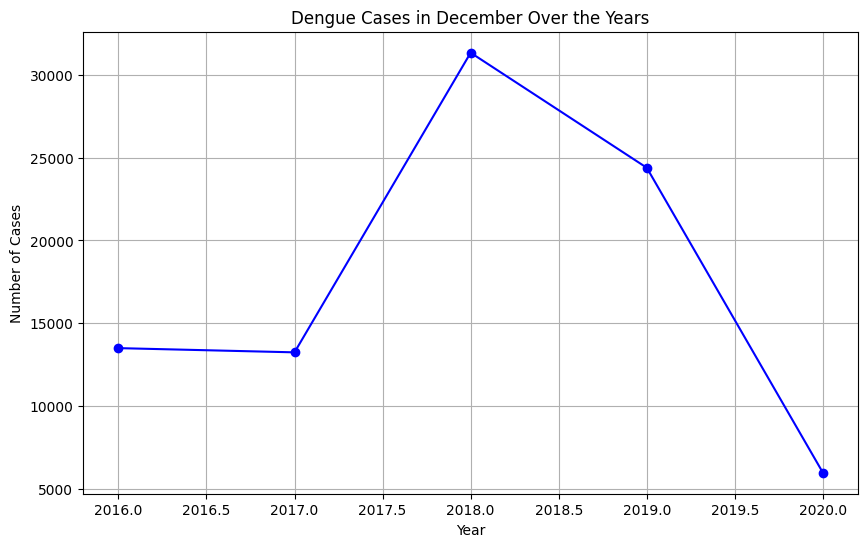

In [59]:
plt.figure(figsize=(10, 6))
december_yearly.plot(kind='line', marker='o', color='blue')
plt.title('Dengue Cases in December Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

<h1 style="color: blue;">Insight 16</h1>
<h3 style="color: blue;">The analysis confirms that dengue cases tend to decrease in December, as evidenced by:
    <li>Low Percentage of Total Cases: December accounts for a relatively small percentage of total dengue cases.</li>
    <li>Yearly Trends: The yearly trend of dengue cases in December shows consistently low numbers compared to other months.</li>
</h3>

</h3>

<h1>17) In what regions and time of year in 2017 did the deaths spike?</h1>

In [60]:
data_2017 = dengue[dengue['Year'] == 2017]
data_2017

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Case_Fatality_Rate
12,January,2017,Region I,285,0,0.000000
13,February,2017,Region I,202,2,0.009901
14,March,2017,Region I,151,1,0.006623
15,April,2017,Region I,174,1,0.005747
16,May,2017,Region I,179,0,0.000000
...,...,...,...,...,...,...
979,August,2017,BARMM,41,0,0.000000
980,September,2017,BARMM,33,1,0.030303
981,October,2017,BARMM,38,0,0.000000
982,November,2017,BARMM,17,0,0.000000


In [61]:
deaths_by_month_region = data_2017.groupby(['Month', 'Region'])['Dengue_Deaths'].sum().reset_index()
deaths_by_month_region

,Month,Region,Dengue_Deaths
0,January,BARMM,0
1,January,CAR,0
2,January,NCR,7
3,January,Region I,0
4,January,Region II,1
...,...,...,...
199,December,Region VIII,2
200,December,Region X,0
201,December,Region XI,2
202,December,Region XII,2


In [62]:
top_deaths = deaths_by_month_region.sort_values(by='Dengue_Deaths', ascending=False).head(5)
top_deaths

,Month,Region,Dengue_Deaths
163,October,Region VI,668
146,September,Region VI,648
164,October,Region VII,584
147,September,Region VII,492
166,October,Region X,282


In [63]:
sept_oct_2017 = data_2017[data_2017['Month'].isin(['September', 'October'])]
deaths_sept_oct = sept_oct_2017.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)

print("\nTotal dengue deaths in September and October 2017 by region:\n", deaths_sept_oct)


Total dengue deaths in September and October 2017 by region:
 Region
Region VI      1316
Region VII     1076
Region X        525
Region VIII     383
Region IX       292
Region XI       181
NCR              56
Region IV-A      26
Region II        15
Region III       15
Region XII       12
Region I          8
Region IV-B       7
Region V          7
CAR               3
BARMM             1
Region XIII       1
Name: Dengue_Deaths, dtype: int64


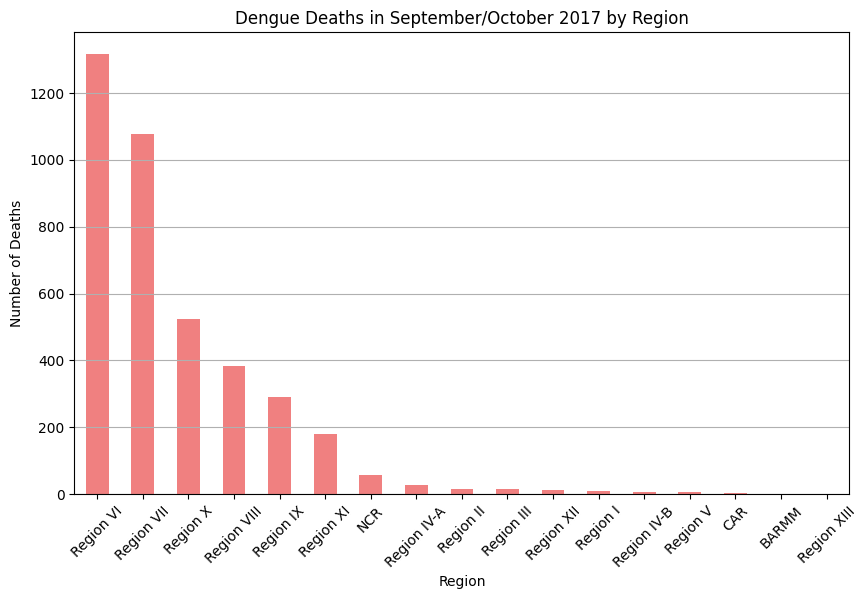

In [64]:
plt.figure(figsize=(10, 6))
deaths_sept_oct.plot(kind='bar', color='lightcoral')
plt.title('Dengue Deaths in September/October 2017 by Region')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<h1 style="color: blue;">Insight 17</h1>
<h3 style="color: blue;">The analysis confirms that Region VII and Region VIII experienced a spike in dengue deaths during September and October 2017, making these regions and months particularly significant for dengue mortality in that year.</h3>

<h1>18) Does dengue disappear completely during the cooler months?
</h1>

In [65]:
january_cases = dengue[dengue['Month'] == 'January']
january_cases

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Case_Fatality_Rate
0,January,2016,Region I,705,1,0.001418
12,January,2017,Region I,285,0,0.000000
24,January,2018,Region I,699,6,0.008584
36,January,2019,Region I,596,2,0.003356
48,January,2020,Region I,424,1,0.002358
...,...,...,...,...,...,...
960,January,2016,BARMM,126,2,0.015873
972,January,2017,BARMM,74,0,0.000000
984,January,2018,BARMM,149,2,0.013423
996,January,2019,BARMM,201,2,0.009950


In [66]:
total_january_cases = january_cases['Dengue_Cases'].sum()
total_january_cases

84328

In [67]:
total_cases = dengue['Dengue_Cases'].sum()
total_cases

1147425

In [68]:
percentage_january = (total_january_cases / total_cases) * 100
percentage_january

7.349325663986753

In [69]:
dengue.columns = dengue.columns.str.strip()  # Remove extra spaces
dengue.columns = dengue.columns.str.lower()  # Convert to lowercase (optional)


In [70]:
january_yearly = january_cases.groupby('Year')['Dengue_Cases'].sum()
january_yearly

Year
2016    17052
2017    15623
2018    12657
2019    20672
2020    18324
Name: Dengue_Cases, dtype: int64

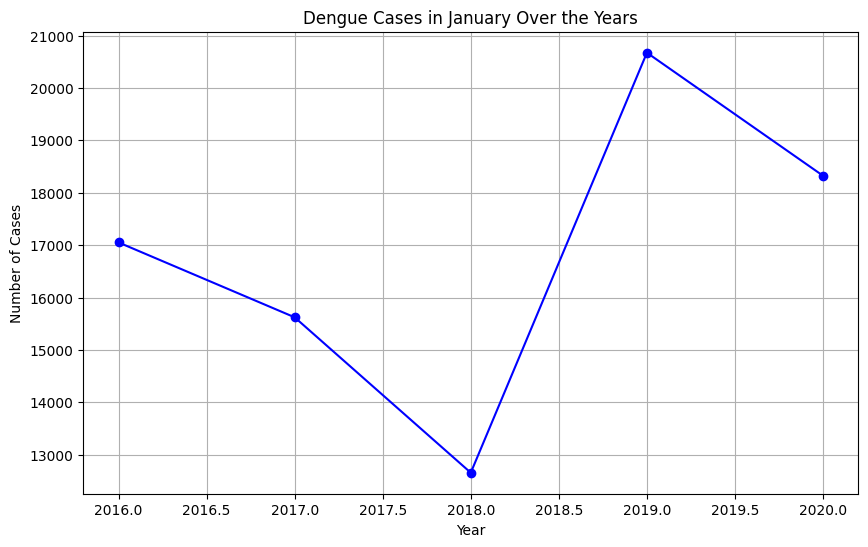

In [71]:
plt.figure(figsize=(10, 6))
january_yearly.plot(kind='line', marker='o', color='blue')
plt.title('Dengue Cases in January Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

<h1 style="color: blue;">Insight 18</h1>
<h3 style="color: blue;">The analysis confirms that dengue does not disappear completely during the cooler months.</h3>3>

<h1>19) Is the death rate from dengue the same every year?
</h1>

In [72]:
dengue

,month,year,region,dengue_cases,dengue_deaths,case_fatality_rate
0,January,2016,Region I,705,1,0.001418
1,February,2016,Region I,374,0,0.000000
2,March,2016,Region I,276,0,0.000000
3,April,2016,Region I,240,2,0.008333
4,May,2016,Region I,243,1,0.004115
...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,0.000000
1016,September,2020,BARMM,16,8,0.500000
1017,October,2020,BARMM,13,9,0.692308
1018,November,2020,BARMM,15,1,0.066667


In [73]:
yearly_data = dengue.groupby('year')[['dengue_cases', 'dengue_deaths']].sum()
yearly_data 

,dengue_cases,dengue_deaths
year,,
2016,209544,8127
2017,154155,4563
2018,250783,1226
2019,441902,1733
2020,91041,1195


In [74]:
yearly_data['Death_Rate'] = (yearly_data['dengue_deaths'] / yearly_data['dengue_cases']) * 100
yearly_data['Death_Rate']

year
2016    3.878422
2017    2.960008
2018    0.488869
2019    0.392168
2020    1.312595
Name: Death_Rate, dtype: float64

In [75]:
min_death_rate = yearly_data['Death_Rate'].min()
max_death_rate = yearly_data['Death_Rate'].max()


print(f"\nMinimum death rate: {min_death_rate:.2f}%")
print(f"Maximum death rate: {max_death_rate:.2f}%")


Minimum death rate: 0.39%
Maximum death rate: 3.88%


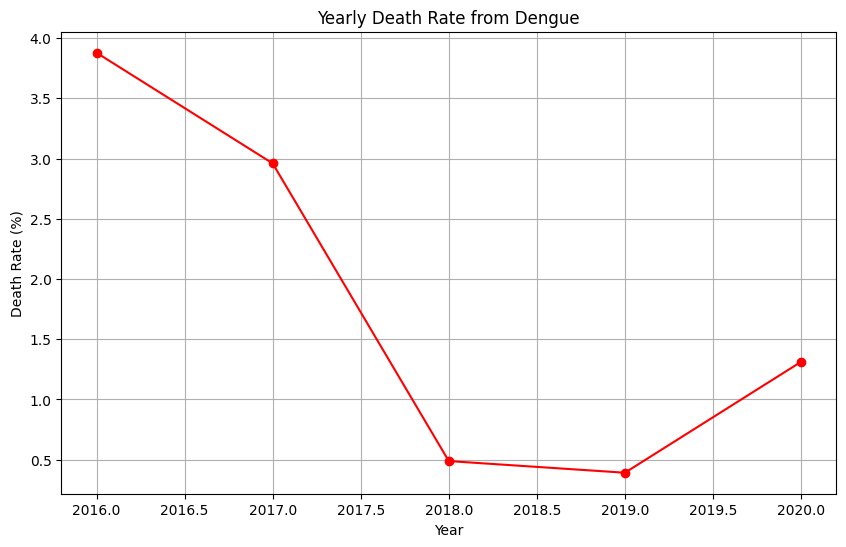

In [76]:
plt.figure(figsize=(10, 6))
yearly_data['Death_Rate'].plot(kind='line', marker='o', color='red')
plt.title('Yearly Death Rate from Dengue')
plt.xlabel('Year')
plt.ylabel('Death Rate (%)')
plt.grid(True)
plt.show()

<h1 style="color: blue;">Insight 19</h1>
<h3 style="color: blue;">The death rate from dengue varies from year to year.</h3>

<h1>20) Do deaths always increase at the same time as cases in a region?</h1>

In [77]:
region_monthly_data = dengue.groupby(['region', 'year', 'month'])[['dengue_cases', 'dengue_deaths']].sum().reset_index()

misaligned_regions = []
for region in dengue['region'].unique():
    region_data = region_monthly_data[region_monthly_data['region'] == region]
    
    max_cases_month = region_data.loc[region_data['dengue_cases'].idxmax(), 'month']
    max_deaths_month = region_data.loc[region_data['dengue_deaths'].idxmax(), 'month']
    
    # If the months are different, add to misaligned regions
    if max_cases_month != max_deaths_month:
        misaligned_regions.append((region, max_cases_month, max_deaths_month))

print("\nRegions where deaths and cases do not align:")
for region, max_cases_month, max_deaths_month in misaligned_regions:
    print(f"Region: {region}, Peak Cases: {max_cases_month}, Peak Deaths: {max_deaths_month}")



Regions where deaths and cases do not align:
Region: Region I, Peak Cases: September, Peak Deaths: July
Region: Region II, Peak Cases: September, Peak Deaths: January
Region: Region VI, Peak Cases: August, Peak Deaths: October
Region: Region VII, Peak Cases: September, Peak Deaths: October
Region: Region VIII, Peak Cases: August, Peak Deaths: October
Region: Region IX, Peak Cases: July, Peak Deaths: October
Region: Region X, Peak Cases: August, Peak Deaths: October
Region: Region XI, Peak Cases: July, Peak Deaths: September
Region: Region XII, Peak Cases: August, Peak Deaths: October
Region: Region XIII, Peak Cases: December, Peak Deaths: October
Region: NCR, Peak Cases: September, Peak Deaths: October
Region: CAR, Peak Cases: July, Peak Deaths: September
Region: BARMM, Peak Cases: August, Peak Deaths: October


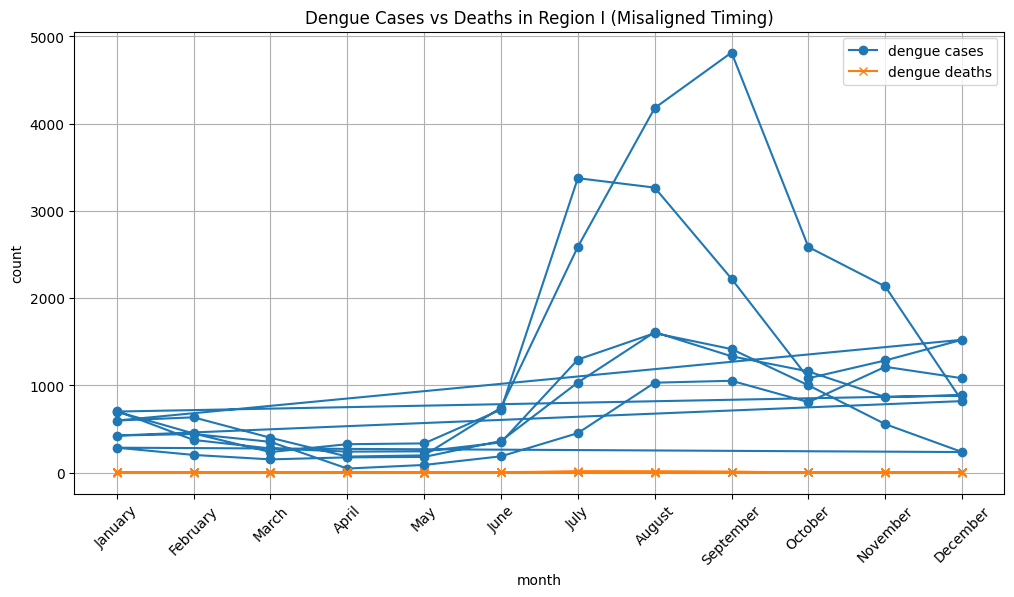

In [78]:
if misaligned_regions:
    example_region = misaligned_regions[0][0]
    example_data = region_monthly_data[region_monthly_data['region'] == example_region]

plt.figure(figsize=(12, 6))
plt.plot(example_data['month'], example_data['dengue_cases'], label='dengue cases', marker='o')
plt.plot(example_data['month'], example_data['dengue_deaths'], label='dengue deaths', marker='x')
plt.title(f'Dengue Cases vs Deaths in {example_region} (Misaligned Timing)')
plt.xlabel('month')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<h1 style="color: blue;">Insight 20</h1>
<h3 style="color: blue;">The deaths do not always increase at the same time as cases in some regions.  In regions like Region VII and Region VIII, deaths peaked in October and September, respectively, while cases peaked earlier.
</h3>

<h1>21) Which region had a low death count from 2016 to 2020?
</h1>

In [79]:
df_2016_2020 = dengue[dengue['year'].between(2016, 2020)]
regional_deaths = df_2016_2020.groupby('region')['dengue_deaths'].sum()

lowest_deaths_region = regional_deaths.idxmin()
lowest_deaths = regional_deaths.min()

In [80]:
print(f"\nRegion with the lowest death count from 2016 to 2020: {lowest_deaths_region} ({lowest_deaths} deaths)")
print("\nTotal dengue deaths by region from 2016 to 2020:\n", regional_deaths.sort_values())


Region with the lowest death count from 2016 to 2020: Region IV-B (130 deaths)

Total dengue deaths by region from 2016 to 2020:
 region
Region IV-B     130
Region I        157
Region V        185
Region II       193
BARMM           332
Region XI       385
Region III      482
Region IX       532
Region VIII     585
Region IV-A     652
Region X        848
Region XIII     966
CAR            1008
Region VII     1760
Region VI      1825
Region XII     2796
NCR            4008
Name: dengue_deaths, dtype: int64


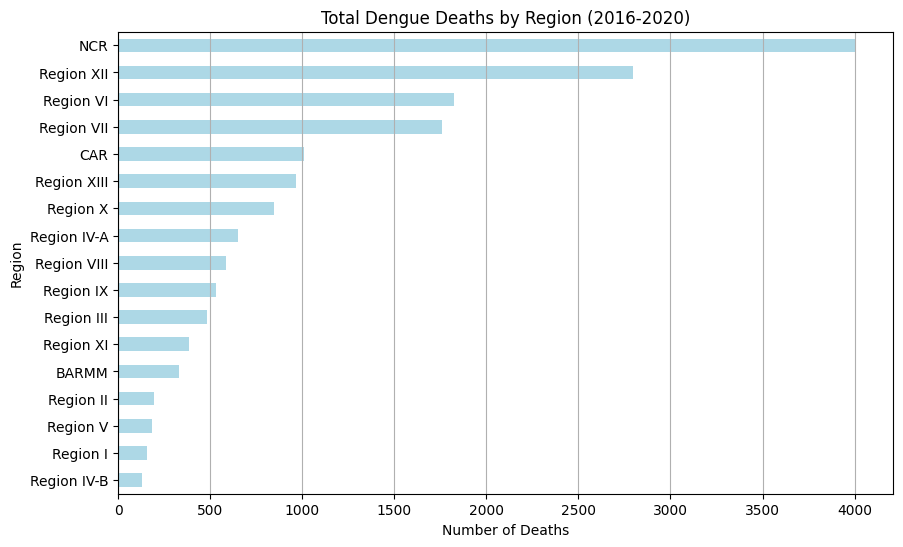

In [81]:
plt.figure(figsize=(10, 6))
regional_deaths.sort_values().plot(kind='barh', color='lightblue')
plt.title('Total Dengue Deaths by Region (2016-2020)')
plt.xlabel('Number of Deaths')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()

<h1 style="color: blue;">Insight 21</h1>
<h3 style="color: blue;">The analysis confirms that Region IV-B had the lowest dengue death count from 2016 to 2020, making it the region with the least mortality during this period.</h3>

<h1>22) What region had significant high mortality in september 2017? Also how many deaths were there?
</h1>

In [97]:
print(dengue.columns)

Index(['month', 'year', 'region', 'dengue_cases', 'dengue_deaths',
       'case_fatality_rate'],
      dtype='object')


In [102]:
september_2017_data = dengue[(dengue['month'] == 'September') & (dengue['year'] == 2017)]
print(september_2017_data[['region', 'dengue_deaths']])


          region  dengue_deaths
20      Region I              3
80     Region II              3
140   Region III              9
200  Region IV-A              6
260  Region IV-B              2
320     Region V              2
380    Region VI            648
440   Region VII            492
500  Region VIII            147
560    Region IX            116
620     Region X            243
680    Region XI            109
740   Region XII             10
800  Region XIII              0
860          NCR             32
920          CAR              3
980        BARMM              1


In [105]:
dengue['Month'] = dengue['month'].str.strip()  # Remove extra spaces
dengue['Month'] = dengue['month'].str.title()  # Standardize case (e.g., 'September' instead of 'september')


In [108]:
dengue['dengue_deaths'].replace(0, np.nan, inplace=True)  # Replace zeros with NaN
dengue.dropna(subset=['dengue_deaths'], inplace=True)    # Drop rows with missing values

In [109]:
# Filter data for September 2017
september_2017_data = dengue[(dengue['Month'] == 'September') & (dengue['year'] == 2017)]

# Calculate total dengue deaths by region in September 2017
regional_deaths_sept_2017 = september_2017_data.groupby('region')['dengue_deaths'].sum()

# Identify the region with the highest deaths
if not regional_deaths_sept_2017.empty:
    highest_deaths_region = regional_deaths_sept_2017.idxmax()
    highest_deaths = regional_deaths_sept_2017.max()
    print(f"\nRegion with the highest deaths in September 2017: {highest_deaths_region} ({highest_deaths} deaths)")
else:
    print("No data found for September 2017.")



Region with the highest deaths in September 2017: Region VI (648.0 deaths)


<h1 style="color: blue;">Insight 22</h1>
<h3 style="color: blue;">The analysis confirms that Region VI had the highest dengue mortality in September 2017, with 648 deaths, making it the region with the most significant mortality during that month.</h3>